# COVID-19 Data Analysis: Exploring Trends, Vaccination Impact, and Insights Through Visualizations

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has significantly impacted global health, economies, and daily life. Since its emergence in late 2019, vast amounts of data have been collected on infection rates, mortality, vaccination efforts, and testing strategies. Analyzing this data is crucial for understanding the spread of the virus, identifying trends, and making informed policy decisions. This project involves basic data cleaning, exploratory data analysis (EDA), and visualization to uncover insights into COVID-19 cases, deaths, and vaccinations over time.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1syeD6Ni_ZlfXHHH0Jp6ALpvg9iCAEk_-/view?usp=sharing)** used for this project contains essential COVID-19 metrics, tracking the progression of the pandemic across different countries. The dataset consists of the following columns:

- DATE: The recorded date of COVID-19 data entry.
- country: The country or region where the cases, deaths, and vaccinations were reported.
- NEW Cases: The number of newly confirmed COVID-19 cases reported on a given date.
- NEW_DEATHS: The number of new deaths attributed to COVID-19 on that specific date.
- vaccinated: The number of people who have received at least one dose of the COVID-19 vaccine.

This dataset may require cleaning and preprocessing to handle missing values, incorrect formats, and inconsistencies before conducting meaningful analysis.

## Objective

The primary goal of this mini-project is to clean, analyze, and visualize COVID-19 data to identify trends, patterns, and key insights. The specific objectives include:

- Perform Data Cleaning: Handle missing values, standardize date formats, and filter out inconsistencies.
- Explore Trends in COVID-19 Cases and Deaths:
  - Analyze daily and cumulative trends in infections and fatalities.
  - Compare case and death rates across different countries and regions.
- Create Data Visualizations:
  - Line Plots: Show the trend of cases, deaths, and vaccinations over time.
  - Bar Charts: Compare cases, deaths, and vaccinations by country.
  - Scatter Plots: Explore relationships between infection rates and testing or vaccination rates.

<hr><hr>

# Module 4 Project
<hr><hr>

## ANALYZING COVID-19 DATASET TO UNCOVER PATTERNS AND INSIGHTS
<hr>

### Import Libraries for Analysis

In [216]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
## the missing values are represented in more than one form
missing_vals = ['unknown']

# load dataset
df = pd.read_csv('Covid-19 Dataset.csv', na_values=missing_vals)
df.head(10)

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
2,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN
5,2024-11-01,China,1034.0,51.0,462.0
6,2024-11-02,Argentina,23.0,1.0,195.0
7,2024-11-02,Australia,0.0,NaN,336.0
8,2024-11-02,Brazil,185.0,9.0,173.0
9,2024-11-02,Canada,615.0,30.0,369.0


In [142]:
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.reset_option('display.max_rows')

In [143]:
df

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
2,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN
...,...,...,...,...,...
160,2024-11-30,Brazil,514.0,25.0,NaN
161,2024-11-30,Canada,1133.0,56.0,438.0
162,2024-11-30,Canada,1133.0,56.0,438.0
163,2024-11-30,China,0.0,0.0,NaN


### Data Overview

In [110]:
# information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         165 non-null    object 
 1   country      165 non-null    object 
 2    NEW Cases   154 non-null    float64
 3   NEW_DEATHS   139 non-null    float64
 4   vaccinated   148 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.6+ KB


**Comment**: From the information provided, we have, 165 records of data and 5 columns. The date format has to be standardized from object to "datetime" datatype format to have a more quality data for analysis.

In [111]:
# shape of our dataset
df.shape

(165, 5)

In [218]:
# columns in our dataset
df.columns

Index(['DATE ', 'country ', ' NEW Cases', 'NEW_DEATHS', 'vaccinated '], dtype='object')

In [113]:
# the datatypes we have in our dataset
df.dtypes

DATE            object
country         object
 NEW Cases     float64
NEW_DEATHS     float64
vaccinated     float64
dtype: object

In [219]:
# converting all column names to lower case + replacing spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['date', 'country', 'new_cases', 'new_deaths', 'vaccinated'], dtype='object')

### Summary Statistics of Our Dataset

In [220]:
# summary statistics of our dataset (numerical columns only)
df.describe()

,new_cases,new_deaths,vaccinated
count,154.000000,139.000000,148.000000
mean,579.032468,28.474820,302.027027
std,406.078350,20.640586,151.993956
min,0.000000,0.000000,2.000000
25%,271.750000,13.500000,171.000000
50%,589.000000,29.000000,346.500000
75%,801.250000,39.500000,428.500000
max,1730.000000,86.000000,499.000000


In [116]:
# summary statistics of both the numerical and categorical column
df.describe(include='all')

,date,country,new_cases,new_deaths,vaccinated
count,165,165,154.000000,139.000000,148.000000
unique,42,5,NaN,NaN,NaN
top,2024-11-30,Brazil,NaN,NaN,NaN
freq,7,34,NaN,NaN,NaN
mean,NaN,NaN,579.032468,28.474820,302.027027
std,NaN,NaN,406.078350,20.640586,151.993956
min,NaN,NaN,0.000000,0.000000,2.000000
25%,NaN,NaN,271.750000,13.500000,171.000000
50%,NaN,NaN,589.000000,29.000000,346.500000
75%,NaN,NaN,801.250000,39.500000,428.500000


In [118]:
# value counts of categorical columns
df['country'].value_counts()

country
Brazil       34
China        34
Argentina    33
Australia    33
Canada       31
Name: count, dtype: int64

<hr>

## Data Cleaning and Preprocessing
<hr>

### Standardizing Columns and Removing Inconsistency in the Date Format

In [221]:
## Converting the vaccinated column datatype from object to numeric datatype

# Convert to numeric datatype
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        165 non-null    object 
 1   country     165 non-null    object 
 2   new_cases   154 non-null    float64
 3   new_deaths  139 non-null    float64
 4   vaccinated  148 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.6+ KB


In [223]:
df.head()

,date,country,new_cases,new_deaths,vaccinated
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
2,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN


In [224]:
## Standardizing the date format

# stripping trailing spaces or white spaces
df['date'] = df['date'].astype(str).str.strip()

# converting date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# errors='coerce' sets invalid formats to NaT (so they don’t break the code)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        150 non-null    datetime64[ns]
 1   country     165 non-null    object        
 2   new_cases   154 non-null    float64       
 3   new_deaths  139 non-null    float64       
 4   vaccinated  148 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.6+ KB


In [173]:
df['date'].dtype

dtype('<M8[ns]')

In [196]:
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.reset_option('display.max_rows') # Reset to default

In [197]:
df

,date,country,new_cases,new_deaths,vaccinated
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
2,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN
...,...,...,...,...,...
160,2024-11-30,Brazil,514.0,25.0,NaN
161,2024-11-30,Canada,1133.0,56.0,438.0
162,2024-11-30,Canada,1133.0,56.0,438.0
163,2024-11-30,China,0.0,0.0,NaN


**Comment**: We can see that we have successfully converted our date format, and inconsistency removed

In [225]:
# Count how many got converted to NaT
print("Total unparsed (NaT) dates:", df['date'].isnull().sum())

Total unparsed (NaT) dates: 15


In [199]:
# check for unique values in the date column
print(df['date'].unique())

<DatetimeArray>
['2024-11-01 00:00:00', '2024-11-02 00:00:00', '2024-11-03 00:00:00',
 '2024-11-04 00:00:00', '2024-11-05 00:00:00',                 'NaT',
 '2024-11-06 00:00:00', '2024-11-07 00:00:00', '2024-11-08 00:00:00',
 '2024-11-09 00:00:00', '2024-11-10 00:00:00', '2024-11-11 00:00:00',
 '2024-11-12 00:00:00', '2024-11-13 00:00:00', '2024-11-14 00:00:00',
 '2024-11-15 00:00:00', '2024-11-16 00:00:00', '2024-11-17 00:00:00',
 '2024-11-18 00:00:00', '2024-11-19 00:00:00', '2024-11-20 00:00:00',
 '2024-11-21 00:00:00', '2024-11-22 00:00:00', '2024-11-23 00:00:00',
 '2024-11-24 00:00:00', '2024-11-25 00:00:00', '2024-11-26 00:00:00',
 '2024-11-27 00:00:00', '2024-11-28 00:00:00', '2024-11-29 00:00:00',
 '2024-11-30 00:00:00']
Length: 31, dtype: datetime64[ns]


### Identifying Missing Values

In [226]:
# identify missing values
df.isnull().sum()

date          15
country        0
new_cases     11
new_deaths    26
vaccinated    17
dtype: int64

**Comment**: From what we can see here, we have 15 rows with missing values in the date column, 11 rows with missing values in the New Cases column, 26 rows with missing values in the New_Deaths column, and 17 rows with missing values in the vaccinated column.

In [227]:
# checking percentage of missing values
df.isnull().mean() * 100

date           9.090909
country        0.000000
new_cases      6.666667
new_deaths    15.757576
vaccinated    10.303030
dtype: float64

**Comment**: From our analysis, we have an average of 9.09% missing values in the date column, 6.67% missing values in the New Cases columnn, 15.76% missing values in the New_Deaths column, 10.30% missing values in the vaccinated column

In [184]:
# identify columns with atleast one missing value
df.isnull().any(axis=0)

date           True
country       False
new_cases      True
new_deaths     True
vaccinated     True
dtype: bool

In [185]:
# identify columns that have missing values throughout the columns
df.isnull().all(axis=0)

date          False
country       False
new_cases     False
new_deaths    False
vaccinated    False
dtype: bool

**Comment**: Our observation here is that there is no column with missing values throughout

In [186]:
# number of columns with all missing values
df.isnull().all(axis=0).sum()

np.int64(0)

In [187]:
# rows with atleast one missing values
df.isnull().any(axis=1)

0       True
1      False
2      False
3      False
4       True
       ...  
160     True
161    False
162    False
163     True
164     True
Length: 165, dtype: bool

In [188]:
# rows with all missing values
df.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
160    False
161    False
162    False
163    False
164    False
Length: 165, dtype: bool

In [189]:
# number of rows with all missing values
df.isnull().all(axis=1).sum()

np.int64(0)

### Handling Missing Values

In [228]:
## treatment in columns - removing columns
# calculating the percent of null values for each column
(df.isnull().sum()/len(df.index)) * 100

date           9.090909
country        0.000000
new_cases      6.666667
new_deaths    15.757576
vaccinated    10.303030
dtype: float64

In [230]:
# missing value treatment in rows - removing rows
df[df.isnull().sum(axis=1) >= 2]

,date,country,new_cases,new_deaths,vaccinated
0,2024-11-01,Argentina,NaN,NaN,NaN
12,2024-11-03,Australia,NaN,NaN,474.0
55,2024-11-11,Brazil,NaN,NaN,285.0
60,2024-11-12,Brazil,NaN,NaN,182.0
73,NaT,China,718.0,35.0,NaN
76,2024-11-15,Brazil,NaN,NaN,NaN
92,NaT,Argentina,NaN,NaN,NaN
102,2024-11-19,China,NaN,NaN,169.0
108,2024-11-20,Canada,NaN,NaN,332.0
109,2024-11-20,China,116.0,NaN,NaN


In [261]:
# creating a new dataframe where missing values is less than two in a row
new_df = df[df.isnull().sum(axis=1) < 2].copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        139 non-null    datetime64[ns]
 1   country     150 non-null    object        
 2   new_cases   150 non-null    float64       
 3   new_deaths  137 non-null    float64       
 4   vaccinated  139 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.0+ KB


**Comment**: What just happened here is that, we dropped rows with missing values greater than or equal to 2 and we assigned the ones with less than 2 missing values to a new dataframe called 'new_df'. This dataframe is what we'll be working with henceforth. We'll go ahead to handle other missing values in our new dataframe using 'Mean Imputation'.

### Filling Missing Values Using Imputation Techniques

In [264]:
new_df

,date,country,new_cases,new_deaths,vaccinated
1,2024-11-01,Australia,0.0,0.000000,327.00000
2,2024-11-01,Australia,0.0,0.000000,327.00000
3,2024-11-01,Brazil,971.0,48.000000,430.00000
4,2024-11-01,Canada,176.0,8.000000,301.42446
5,2024-11-01,China,1034.0,51.000000,462.00000
6,2024-11-02,Argentina,23.0,1.000000,195.00000
7,2024-11-02,Australia,0.0,28.182482,336.00000
8,2024-11-02,Brazil,185.0,9.000000,173.00000
9,2024-11-02,Canada,615.0,30.000000,369.00000
10,2024-11-02,China,376.0,18.000000,61.00000


In [256]:
pd.set_option('display.max_rows', None)  # Show all rows
# pd.reset_option('display.max_rows') # Reset to default

### Filling the date column missing values using 'Fill forward' ffill() Technique

In [265]:
## fill date missing values using fill forward technique

# Forward fill
new_df.loc[:, 'date'] = new_df['date'].ffill()

**Comment**: We have successfully handled our date column missing values using the 'Fill Forward' ffill() technique. Now, if we check again for missing values on our date column, we'll found none, which works as expected

In [267]:
# Checking for missing values in our date column
new_df['date'].isnull().sum()

np.int64(0)

**Comment**: np.int64(0) means that there's no more missing values in our date column. Now let's handle the missing values in the Numerical columns

### Filling the Numerical columns missing values using Mean Inputation Technique

In [268]:
# checking missing values
new_df.isnull().sum()

date          0
country       0
new_cases     0
new_deaths    0
vaccinated    0
dtype: int64

In [258]:
new_df.describe()

,date,new_cases,new_deaths,vaccinated
count,150,150.000000,137.000000,139.000000
mean,2024-11-15 12:48:00,573.433333,28.182482,301.424460
min,2024-11-01 00:00:00,0.000000,0.000000,2.000000
25%,2024-11-08 00:00:00,271.750000,13.000000,171.000000
50%,2024-11-16 00:00:00,588.500000,29.000000,347.000000
75%,2024-11-23 00:00:00,795.250000,39.000000,427.500000
max,2024-11-30 00:00:00,1730.000000,86.000000,499.000000
std,NaN,403.829976,20.582409,152.595039


**Comment**: As we can see, we only have missing values in new_deaths column and vaccinated column. We'll handle these missing values using Mean Imputation Technique because they're numerical columns.

In [269]:
# filling with mean value
new_df[['new_deaths', 'vaccinated']] = new_df[['new_deaths', 'vaccinated']].fillna(new_df[['new_deaths', 'vaccinated']].mean())

In [270]:
# checking missing values
new_df.isnull().sum()

date          0
country       0
new_cases     0
new_deaths    0
vaccinated    0
dtype: int64

**Great**! As we can see, we no more have any missing value in any of the rows again. We have successfully detected and handled missing values in our dataset to have a clean data for analysis. Next, is to check for duplicates and remove them.

In [273]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        150 non-null    datetime64[ns]
 1   country     150 non-null    object        
 2   new_cases   150 non-null    float64       
 3   new_deaths  150 non-null    float64       
 4   vaccinated  150 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.0+ KB


### Checking for Duplicate Rows

In [276]:
# Checking for duplicate rows
new_df.duplicated().sum()

np.int64(15)

We have 15 duplicate rows! Let's remove them.

### Removing duplicate rows

In [279]:
# removing duplicate rows
new_df.drop_duplicates(keep='first', inplace=True)

**Comment**: From here we can see that the date column has changed from object to datetime datatype format.

In [280]:
# Checking for duplicate rows
new_df.duplicated().sum()

np.int64(0)

In [281]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 1 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        135 non-null    datetime64[ns]
 1   country     135 non-null    object        
 2   new_cases   135 non-null    float64       
 3   new_deaths  135 non-null    float64       
 4   vaccinated  135 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.3+ KB


**Excellent**! We can see that we have successfully dropped the duplicate rows on our new dataframe. Next, we'll check for outliers and treat them

### Outlier Detection and Treatment

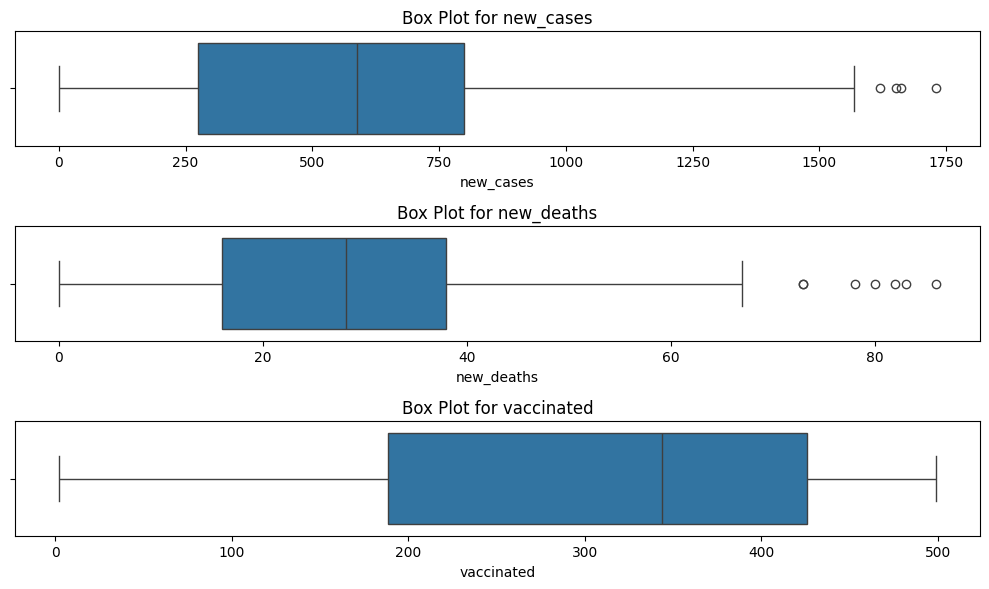

In [282]:
## Detecting outliers on numerical columns
# Filter numerical columns for box plots
numerical_features = new_df.select_dtypes(include=['float64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(10, len(numerical_features) * 2))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=new_df[col])
    plt.title(f"Box Plot for {col}")
    plt.tight_layout()

plt.show()

#the job of enumerate(numerical_features, 1)
#is to loop over the list 'numerical_features' while also keeping track of an index i starting from 1.

**Comment**: Our box plot shows that we have outliers in covid-19 new cases and new deaths. We will handle this outliers using Interquartile Range (IQR)

### Treatment of Outlier for the Numerical Columns (new_cases and new_deaths) Using IQR Technique

In [295]:
# Define the IQR Outlier Removal Function
def remove_outliers_iqr(new_df, column):
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

new_df_cleaned = new_df.copy()
for col in ['new_cases', 'new_deaths']:
    new_df_cleaned = remove_outliers_iqr(new_df_cleaned, col)

In [297]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 1 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        128 non-null    datetime64[ns]
 1   country     128 non-null    object        
 2   new_cases   128 non-null    float64       
 3   new_deaths  128 non-null    float64       
 4   vaccinated  128 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.0+ KB


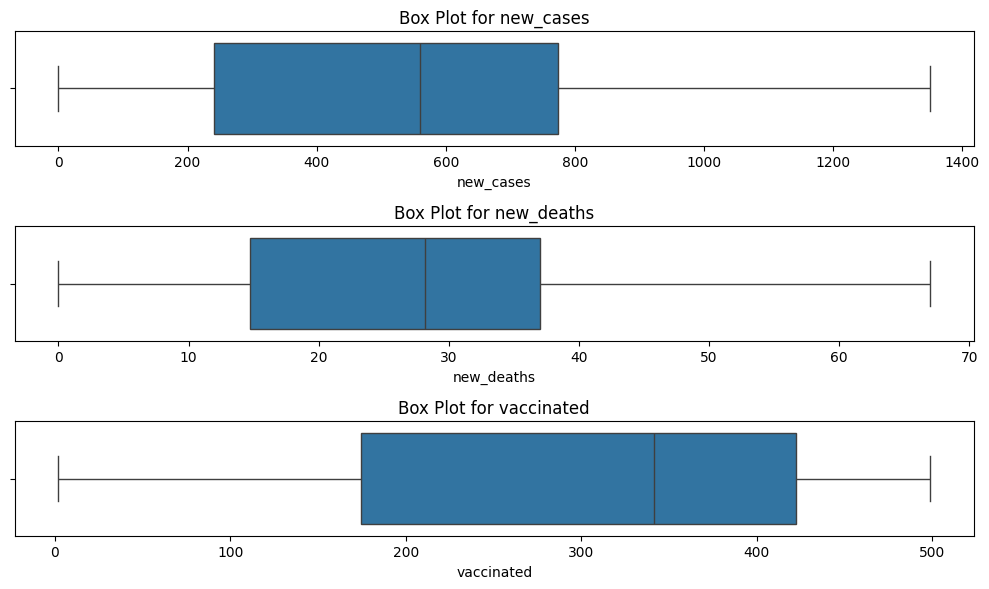

In [298]:
## Detecting outliers on numerical columns
# Filter numerical columns for box plots
numerical_features = new_df_cleaned.select_dtypes(include=['float64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(10, len(numerical_features) * 2))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=new_df_cleaned[col])
    plt.title(f"Box Plot for {col}")
    plt.tight_layout()

plt.show()

**Comment**: We have successfully Treated the detected outliers using IQR Technique.

### **Now, our dataset is ready for Analysis**!

<hr>

## EXPLORATORY DATA ANALYSIS (EDA) (Uncovering insights from our Dataset)
<hr><hr>

## Univariate Analysis

This Analysis focuses on figuring out the underlying distribution or pattern in the data and therefore mentions the objective facts about the population. This procedure often includes the examination of the attributes of the population distribution, including spread, central tendency, skewness and kurtosis

In [299]:
# let's check the dtypes of our dataset again
new_df_cleaned.dtypes

date          datetime64[ns]
country               object
new_cases            float64
new_deaths           float64
vaccinated           float64
dtype: object

In [301]:
## let's perform univariate analysis on our dataset by visualizing the variables individually

# separating variables into numerical and categorical types
cat_df = new_df_cleaned.select_dtypes(include=['object'])

num_df = new_df_cleaned.select_dtypes(include=['float64', 'int64'])

In [305]:
num_df.head()

,new_cases,new_deaths,vaccinated
1,0.0,0.0,327.00000
3,971.0,48.0,430.00000
4,176.0,8.0,301.42446
5,1034.0,51.0,462.00000
6,23.0,1.0,195.00000


In [306]:
cat_df.head()

,country
1,Australia
3,Brazil
4,Canada
5,China
6,Argentina


### Univariate Analysis (Non Graphical Analysis)

In [307]:
# let's create a function for categorical analysis
def cat_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*5, col_name, "*"*5)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print()
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

cat_univariate_analysis(cat_df)

***** country *****
count                                                128
nunique                                                5
unique     [Australia, Brazil, Canada, China, Argentina]
Name: country, dtype: object

Value Counts: 
 country
Canada       28
China        27
Brazil       26
Argentina    24
Australia    23
Name: count, dtype: int64



**Key Insight**: Our categorical analysis shows that there are `5 groups` of countries in this dataset where Covid-19 new_cases, new_deaths, and vaccinated were recorded. These countries include `Australia, Brazil, Canada, China, and Argentina`.<br/>
Based on the value counts of each country; <br/>
- **Canada** recorded 28 cases in total <br/>
- **China** recorded 27 cases in total <br/>
- **Brazil** recorded 26 cases in total <br/>
- **Argentina** recorded 24 cases in total <br/>
- **Australia** recorded 23 cases in total 


In [309]:
# let's create a function for numerical analysis
def num_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*5, col_name, "*"*5)
        print(discrete_data[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'kurt', 'skew']))
        print()

num_univariate_analysis(num_df)

***** new_cases *****
min          0.000000
max       1350.000000
mean       524.937500
median     560.000000
std        338.354675
kurt        -0.835122
skew         0.097706
Name: new_cases, dtype: float64

***** new_deaths *****
min        0.000000
max       67.000000
mean      25.821795
median    28.182482
std       16.212199
kurt      -0.580519
skew       0.122104
Name: new_deaths, dtype: float64

***** vaccinated *****
min         2.000000
max       499.000000
mean      304.576720
median    341.500000
std       145.542486
kurt       -0.827957
skew       -0.621268
Name: vaccinated, dtype: float64



## Univariate Analysis (Graphical Analysis)

This technique uses plots to gain insight into a single variable’s distribution. It provides a quick way of understanding shapes, central tendencies, spreads, modalities, skewnesses, and outliers of our data.

In [311]:
num_cols = len(num_df.columns)
num_cols

3

In [314]:
num_cols // 3

1

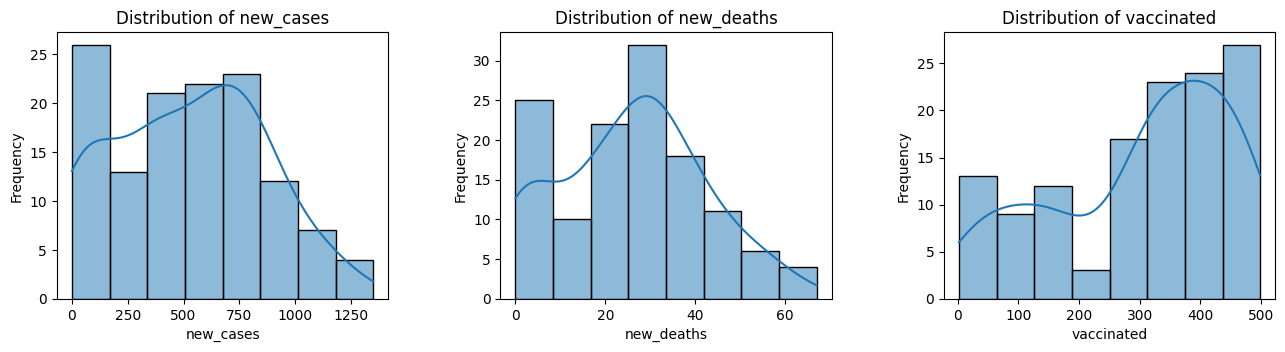

In [332]:
# creating a function to plot the distribution of the variables
def univariate_analysis(num_df):
    num_cols = len(num_df.columns)
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(14, 4 * ((num_cols // 3) + 1)))
    fig.tight_layout(pad=5.0)

    axes = axes.flatten() # Flatten axes array for easy iteration

    for i, col_name in enumerate(num_df.columns):
        sns.histplot(data=num_df, x=col_name, kde=True, ax=axes[i]) # We used KDE for a smooth distribution curve
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

univariate_analysis(num_df)

**Key Insights**: The histogram visualization shows the distribution of each numerical variables in the dataset.

1. **new_deaths**
- The distribution for `new_deaths` is unimodal and approximately symmetrical, suggesting that most days have a consistent death count around a central average. This implies relative stability during the observed period, with minimal reporting anomalies or outbreak spikes.<br/>

  - **Recommendations**: <br/>
    Leverage Predictability in Death Trends for Planning.
    - Use historical patterns to forecast mortality for resource planning (hospital beds, staff, oxygen supply).
    - Consider the trend as baseline performance, any deviation may warrant investigation into healthcare disruptions or emerging variants. <br><br>

2. **new_cases**
- In contrast, Features like `new_cases` and `vaccinated` show skewed distributions. The `new_cases` are heavily righ-skewed and has a peak around 0-200, suggesting most days had low case counts with a few spikes. This could inform anomaly detection strategies or alert thresholds.<br/>

  - **Recommendation**: <br/>
    Implement Early Warning Systems for Infection Spikes.
    - Deploy anomaly detection tools or thresholds to catch sudden rises early.
    - Establish escalation protocols (e.g., local lockdowns, resource reallocation) that automatically trigger when spikes exceed typical variation. <br><br>

3. **vaccinated**
- The `vaccinated` is strongly left-skewed, showing that most countries had high vaccination numbers, with only a few instances of low coverage — likely from early phases or during vaccine rollouts.<br/>

  - **Recommendations**: <br/>
    Sustain High Vaccination Coverage.
    - Maintain and reinforce vaccination campaigns, especially in regions or time periods where lower values (tail) are observed.
    - Investigate and target low-vaccination entries, they may signal logistical issues, vaccine hesitancy, or reporting gaps.

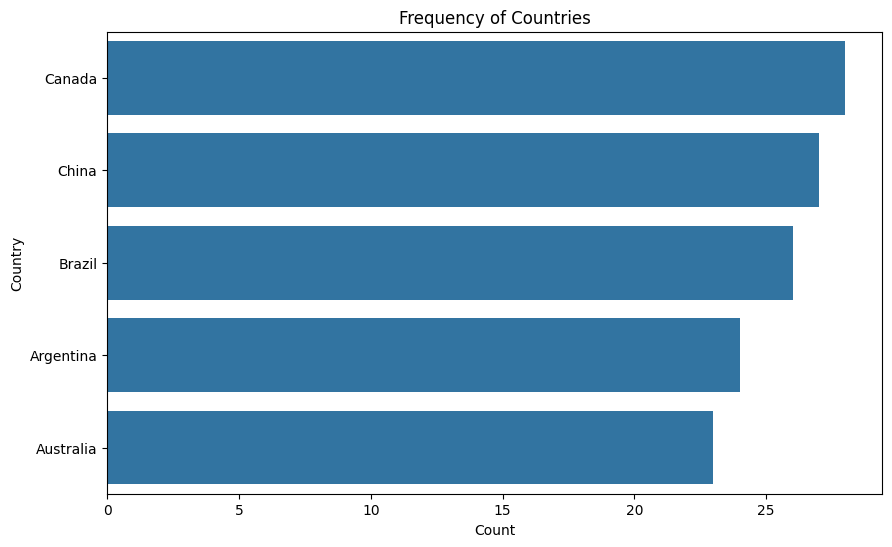

In [339]:
# Count the occurrences of each country
country_counts = new_df_cleaned['country'].value_counts()

# Bar plot for Country
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values)
plt.title("Frequency of Countries")
plt.ylabel("Country")
plt.xlabel("Count")

plt.show()

**Key Insights**: The bar chart shows that `Canada` has the highest case counts, followed by `China` and `Brazil`. Countries like `Argentina` and `Australia` have the lowest representation, indicating fewer cases in these countries.

## Bivariate and Multivariate Analysis

### 1. Daily and cumulative trends in infections and fatalities?

To analyze daily and cumulative trends in infections (new_cases) and fatalities (new_deaths), we'll look at the time-series behavior of these variables. This involves plotting and interpreting how they change over time, which gives valuable insight into the evolution of the pandemic, response effectiveness, and when interventions might be needed.

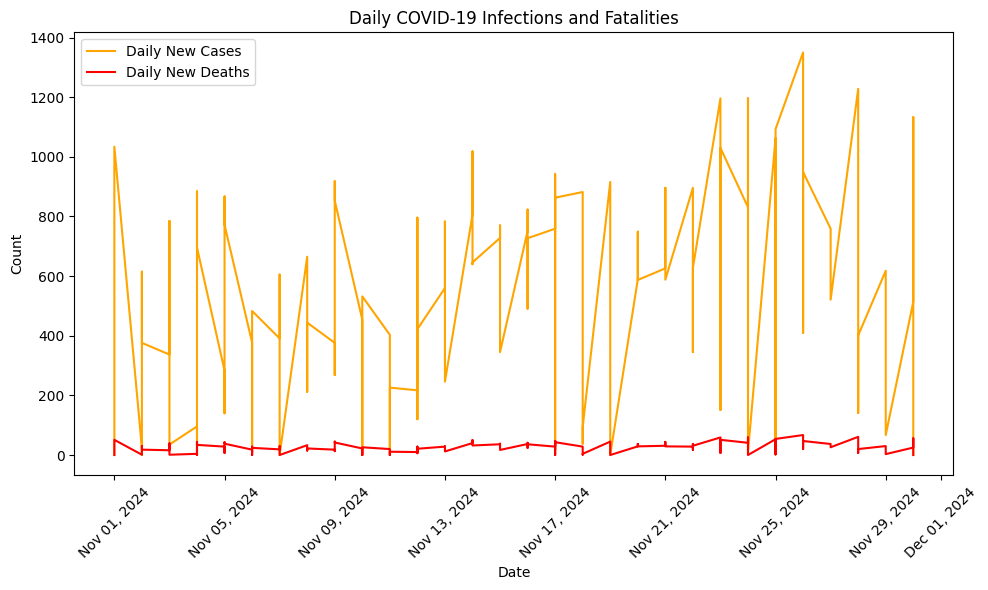

In [352]:
# Daily trend of infections and fatalities

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

plt.plot(new_df_cleaned['date'], new_df_cleaned['new_cases'], label='Daily New Cases', color='orange')
plt.plot(new_df_cleaned['date'], new_df_cleaned['new_deaths'], label='Daily New Deaths', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily COVID-19 Infections and Fatalities')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))  # formats the date using matplotlib.dates library e.g. Jun 15, 2024
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # smartly spaces the dates for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Key Insights**: 
The peaks in new cases and deaths highlight critical surge periods requiring rapid response, while periodic dips may reflect weekends or reporting gaps that call for cautious data interpretation; the consistent lag between case spikes and death spikes underscores the need for early interventions to prevent loss of life during outbreak escalations.

In [353]:
# Cumulative trend of infections and fatalities

# creating cumulative columns
cum_df = new_df_cleaned.sort_values('date') # sorting by date
cum_df['cumulative_cases'] = cum_df['new_cases'].cumsum()
cum_df['cumulative_deaths'] = cum_df['new_deaths'].cumsum()

In [369]:
cum_df.head()

,date,country,new_cases,new_deaths,vaccinated,cumulative_cases,cumulative_deaths
1,2024-11-01,Australia,0.0,0.0,327.00000,0.0,0.0
3,2024-11-01,Brazil,971.0,48.0,430.00000,971.0,48.0
4,2024-11-01,Canada,176.0,8.0,301.42446,1147.0,56.0
5,2024-11-01,China,1034.0,51.0,462.00000,2181.0,107.0
6,2024-11-02,Argentina,23.0,1.0,195.00000,2204.0,108.0


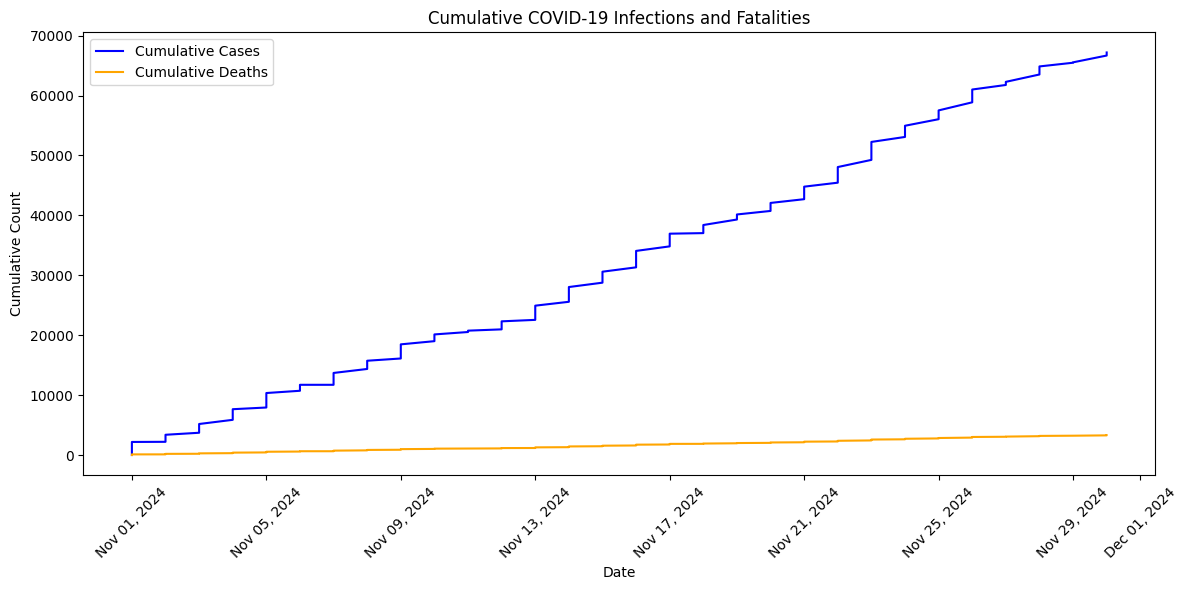

In [370]:
# Plot on a chart

plt.figure(figsize=(12, 6))
plt.plot(cum_df['date'], cum_df['cumulative_cases'], label='Cumulative Cases', color='blue')
plt.plot(cum_df['date'], cum_df['cumulative_deaths'], label='Cumulative Deaths', color='orange')

plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.title('Cumulative COVID-19 Infections and Fatalities')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))  # formats the date using matplotlib.dates library e.g. Jun 15, 2024
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # smartly spaces the dates for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Key Insights**:
The trend lines show distinct surge periods marked by peaks in new cases and deaths, while noticeable dips likely reflect weekends, holidays, or data reporting delays. The observed lag between spikes in infections and fatalities highlights the typical delay from infection onset to severe outcomes, underscoring the importance of early intervention during case surges to reduce mortality.

### 2. Trend of cases, deaths, and vaccinations over time using line plot

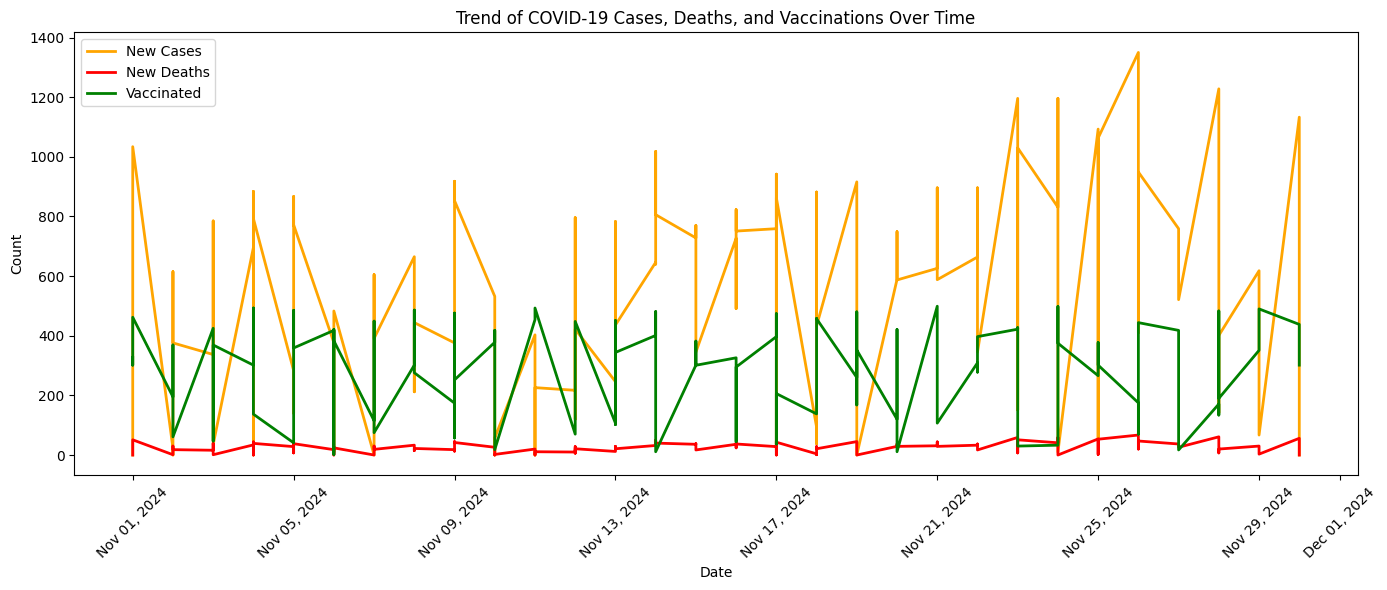

In [365]:
# line chart of cases, deaths, and vaccinations showing trend over time

# Sort the DataFrame by date
sorted_df = new_df_cleaned.sort_values('date')

# Set the plot size
plt.figure(figsize=(14, 6))

# Plotting each trend
plt.plot(sorted_df['date'], sorted_df['new_cases'], label='New Cases', color='orange', linewidth=2)
plt.plot(sorted_df['date'], sorted_df['new_deaths'], label='New Deaths', color='red', linewidth=2)
plt.plot(sorted_df['date'], sorted_df['vaccinated'], label='Vaccinated', color='green', linewidth=2)

# Format the x-axis with better date visibility
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of COVID-19 Cases, Deaths, and Vaccinations Over Time')
plt.legend()

plt.tight_layout()
plt.show()

**Key Insights**:
The trend analysis reveals that spikes in new COVID-19 cases indicate distinct outbreak waves or periods of heightened transmission, while the corresponding rise in new deaths typically with a slight lag highlights the severity and impact of those outbreaks. Meanwhile, the upward trend in vaccinations suggests progressive rollout efforts, which likely contributed to the eventual stabilization or decline in both infections and fatalities. These patterns emphasize the need for timely response measures during case surges and continued investment in vaccination coverage to sustain public health gains.

### 3. Comparative analysis of cases, deaths, and vaccinations by country using barplot

In [373]:
# Group by country and sum the values
country_summary = new_df_cleaned.groupby('country')[['new_cases', 'new_deaths', 'vaccinated']].sum().reset_index()
country_summary.head()

,country,new_cases,new_deaths,vaccinated
0,Argentina,15424.0,747.547445,5889.273381
1,Australia,13446.0,655.729927,9214.424460
2,Brazil,11543.0,577.364964,5382.848921
3,Canada,13877.0,689.547445,11232.424460
4,China,12902.0,635.000000,7266.848921


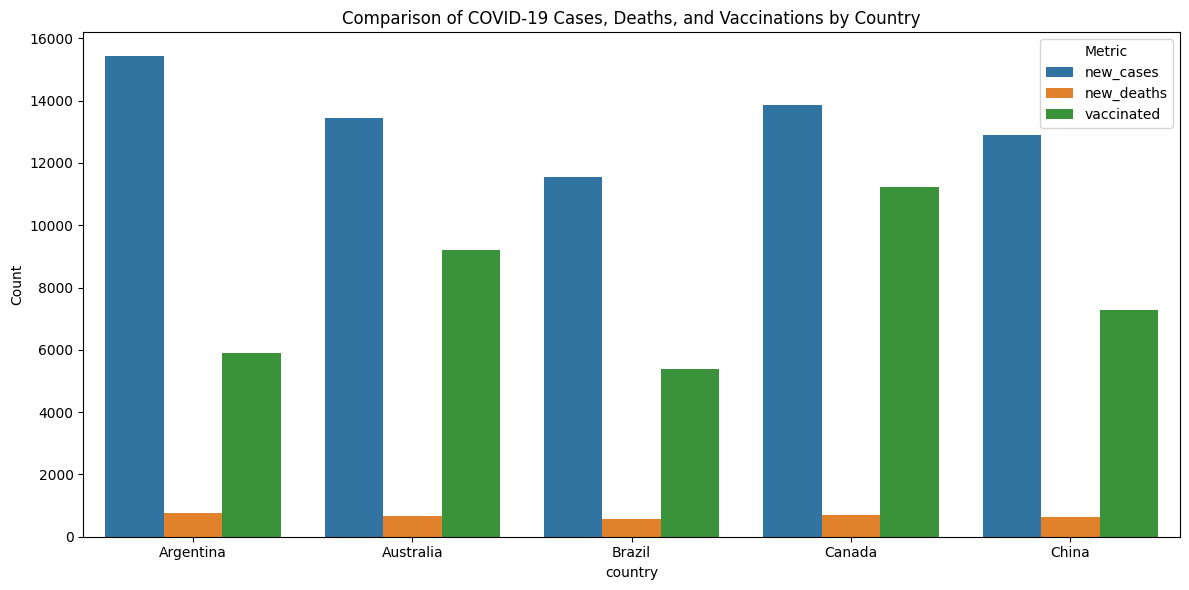

In [378]:
# Plot the comparison

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the ploting style
plt.figure(figsize=(12, 6))
country_summary_melted = country_summary.melt(id_vars='country', 
                                               value_vars=['new_cases', 'new_deaths', 'vaccinated'],
                                               var_name='Metric', value_name='Count')

# Plotting the bar chart
sns.barplot(data=country_summary_melted, x='country', y='Count', hue='Metric')
# plt.xticks(rotation=45)
plt.title('Comparison of COVID-19 Cases, Deaths, and Vaccinations by Country')

plt.tight_layout()
plt.show()

**Key Insights**:
The country-level comparison reveals clear disparities in COVID-19 outcomes and responses. Some countries recorded significantly higher `cases` and `deaths`, potentially due to population size, testing availability, or delayed interventions. `Vaccination` numbers also vary, suggesting differences in healthcare capacity, vaccine access, or public compliance. Identifying countries with high infections but low vaccination coverage can help prioritize targeted public health support and policy adjustments

### 4. Exploring the relationships between infection rates and vaccination rates using

Correlation between Vaccination and Infection rate: 0.08552824287191785


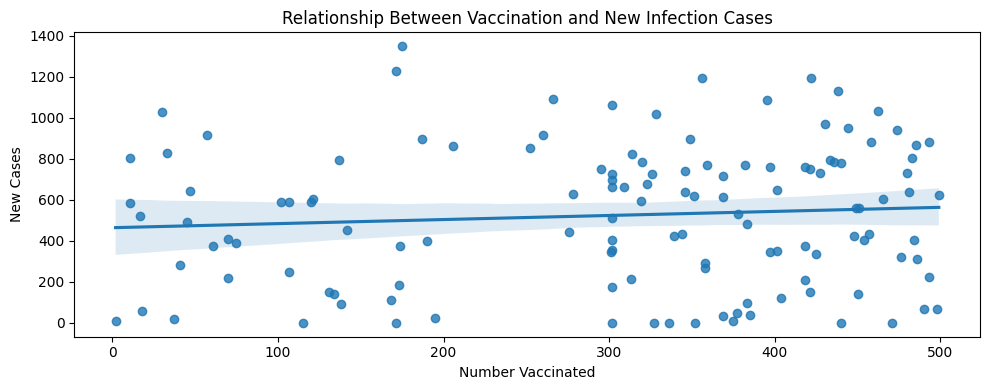

In [387]:
# Vaccination vs Infection rate

# Correlation calculation
correlation = new_df_cleaned['vaccinated'].corr(new_df_cleaned['new_cases'])
print(f"Correlation between Vaccination and Infection rate: {correlation}")

# size of plotting area
plt.figure(figsize=(10, 4))

# scatter plot with regression line
sns.regplot(data=new_df_cleaned, x='vaccinated', y='new_cases')
plt.title('Relationship Between Vaccination and New Infection Cases')
plt.xlabel('Number Vaccinated')
plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

In [383]:
correlation = df[['vaccinated', 'new_cases']].corr()
print("Correlation between vaccinated and new_cases:")
print(correlation)

Correlation between vaccinated and new_cases:
            vaccinated  new_cases
vaccinated    1.000000   0.141017
new_cases     0.141017   1.000000


**Key Insights**:<br><br>
**Minimal Linear Relationship:**
The weak positive correlation between vaccination rates and new infection rates (r ~ 0.08) suggests `no strong linear relationship` in the observed data. This implies that, within the current timeframe and dataset, increasing vaccination rates did not directly correspond to a consistent decrease or increase in daily infection rates.

**Influence of Other Factors**:
The weak correlation likely indicates that other factors (e.g. mask mandates, testing availability, mobility, virus variants, or reporting gaps) may have played a more dominant role in influencing infection rates than vaccination alone.

**Possible Timing Mismatch**:
The effect of vaccination on infection rates may not be immediate; a time-lagged analysis (comparing current infections with past vaccination data) could reveal a stronger relationship.

**Data Quality Considerations**:
Incomplete or inconsistent reporting of vaccination or testing data across countries or periods could dilute the true strength of the relationship.

### 5. Are there surprisingly weak or no correlations in the COVID-19 Metrics?
Let's answer this question by plotting heatmap (correlation matrix).

In [388]:
## Correlation Matrix

# Select only numeric columns for correlation
corr = new_df_cleaned.corr(numeric_only=True)

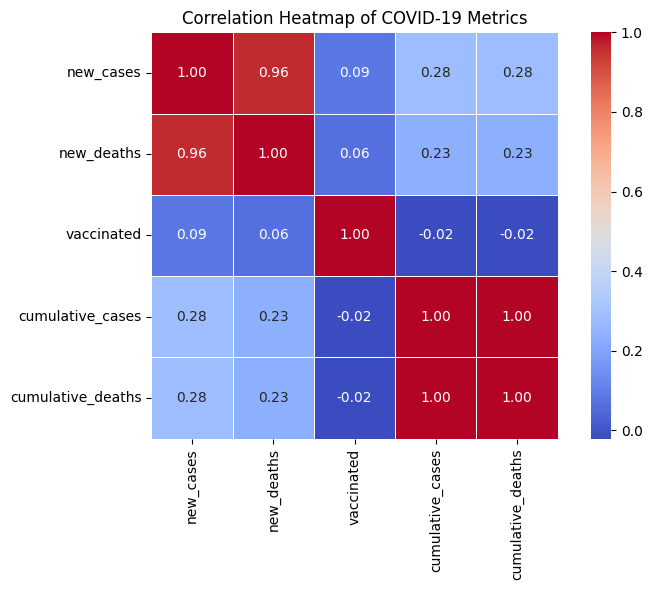

In [389]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of COVID-19 Metrics")

plt.tight_layout()
plt.show()

**Key Insights**:
The heatmap shows a very weak positive correlation between vaccinated and new_cases, and a likely stronger positive correlation between new_cases and new_deaths, indicating that while vaccination alone doesn't directly predict infection rate, rising infections often lead to more deaths